In [2]:
## importing libraries ##

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from os import path

DATA_DIR = '/Users/cstone/Downloads'

df = pd.read_csv(path.join(DATA_DIR, 'AgeDataset-V1.csv'))

In [3]:
print(df.columns)

Index(['Id', 'Name', 'Short description', 'Gender', 'Country', 'Occupation',
       'Birth year', 'Death year', 'Manner of death', 'Age of death'],
      dtype='object')


In [4]:
print(df.sample(5))

                Id                           Name  \
1043488  Q28868462  Johann Sigismund von Glaubitz   
244122    Q2263400                    Maarten Bon   
125179    Q1034438                   Ernő Hauszer   
1015118  Q25999367                Patrizio Donati   
310994    Q3179040                    Jimmy Dykes   

                                Short description Gender  \
1043488                  preußischer Generalmajor   Male   
244122                 Dutch composer and pianist   Male   
125179                                        NaN   Male   
1015118                                       NaN   Male   
310994   American baseball player, coach, manager   Male   

                            Country Occupation  Birth year  Death year  \
1043488                         NaN        NaN        1764      1838.0   
244122   Kingdom of the Netherlands     Artist        1933      2003.0   
125179                          NaN        NaN        1805      1868.0   
1015118                 

In [6]:

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Id - 0%
Name - 0%
Short description - 6%
Gender - 11%
Country - 27%
Occupation - 17%
Birth year - 0%
Death year - 0%
Manner of death - 96%
Age of death - 0%


In [35]:
df1 = df.groupby('Gender')['Age of death'].mean()
print(df1)

Gender
Eunuch                                            51.333333
Eunuch; Male                                      63.611111
Female                                            71.307846
Female; Female                                    75.000000
Female; Male                                      71.428571
Intersex                                          59.000000
Intersex; Female                                  64.000000
Intersex; Male                                    55.500000
Intersex; Transgender Male                        79.000000
Male                                              69.185657
Non-Binary                                        61.000000
Non-Binary; Intersex                              22.000000
Transgender Female                                49.810127
Transgender Female; Female                        65.000000
Transgender Female; Intersex                      61.000000
Transgender Female; Male                          37.000000
Transgender Male                 

<function matplotlib.pyplot.show(close=None, block=None)>

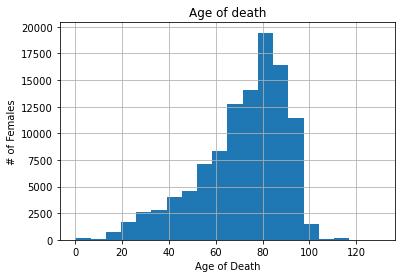

In [47]:
 ## females seem to live longer than males, let's see their age distribution ##

df.loc[df['Gender'] == 'Female'].hist(column=['Age of death'], bins = 20)
plt.xlabel('Age of Death')
plt.ylabel('# of Females')
plt.show

In [74]:
df2 = (df.groupby('Death year')['Age of death'].mean().reset_index())

In [75]:
## Look at average age od death for the last 250 years 

df250 = (df2.tail(250))

In [69]:
print(df250)

Death year
1772.0    61.210169
1773.0    61.806159
1774.0    61.861404
1775.0    63.267692
1776.0    62.331190
            ...    
2017.0    79.089162
2018.0    79.060775
2019.0    79.450289
2020.0    80.231658
2021.0    79.904859
Name: Age of death, Length: 250, dtype: float64


In [76]:
type(df250)

pandas.core.frame.DataFrame

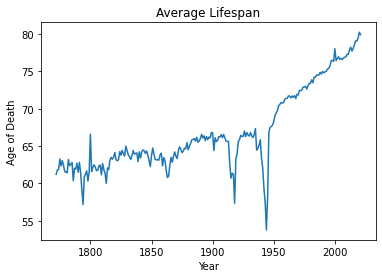

In [81]:
plt.plot('Death year', 'Age of death', data=df250)
plt.xlabel('Year')
plt.ylabel('Age of Death')
plt.title('Average Lifespan')
plt.show()

In [5]:
## 10 most common occupations

df3 = df.groupby('Occupation')['Occupation'].count().sort_values(ascending=False).head(10)
print(df3)

Occupation
Artist                281512
Politician            195390
Athlete               110943
Researcher             90709
Military personnel     52911
Religious figure       37086
Businessperson         19529
Architect              17865
Journalist             16002
Teacher                15693
Name: Occupation, dtype: int64


In [20]:
## Most common occupation by death year, incremented by 50 years

df4= df.groupby(['Death year'])['Occupation'].agg(pd.Series.mode).tail(700)
print(df4.iloc[::50])

Death year
1322.0                                Politician
1372.0    [Aristocrat, Artist, Religious figure]
1422.0                                Politician
1472.0                      [Aristocrat, Artist]
1522.0                                    Artist
1572.0                                    Artist
1622.0                                    Artist
1672.0                                    Artist
1722.0                                Politician
1772.0                                    Artist
1822.0                                Politician
1872.0                                Politician
1922.0                                    Artist
1972.0                                    Artist
Name: Occupation, dtype: object
